# Section 1: Coordinate transformations

### Imports needed

In [4]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt

### Initializing a Skycoord object

Converting between frames. Start in ICRS (approx. equatorial) frame (which happens to be the default used by astropy).

In [6]:
hcg7_center = SkyCoord(9.81625*u.deg, 0.88806*u.deg, frame='icrs')  #using degrees directly. since using degree, tell it u.deg
print(hcg7_center)

hcg7_center = SkyCoord('0h39m15.9s', '0d53m17.016s', frame='icrs')  #passing  values in string format using time units
print(hcg7_center)

<SkyCoord (ICRS): (ra, dec) in deg
    (9.81625, 0.88806)>


In [14]:
print(hcg7_center.ra)
print(hcg7_center.dec)
print(hcg7_center.ra.hour)

9d48m58.5s
0d53m17.016s
0.6544166666666668


### Transforming coordinates

#### Using attributes

In [15]:
hcg7_center.galactic

<SkyCoord (Galactic): (l, b) in deg
    (116.47556813, -61.83099472)>

#### Using transform_to()

In [16]:
hcg7_center.transform_to('galactic')

<SkyCoord (Galactic): (l, b) in deg
    (116.47556813, -61.83099472)>

### Using Astropy to access real data sets

Import some additional modules from Python library, in a way that supports Python 2&3

In [17]:
try:
    #Python 3.x
    from urllib.parse import urlencode
    from urllib.request import urlretrieve
except ImportError:
    #Python 2.x
    from urllib import urlencode
    from urllib import urlretrieve
import IPython.display

Getting picture from Sloan Digital Sky Survey

In [39]:
impix = 512
#makes photo larger or smaller)
imsize = 12*u.arcmin 
#zooms in and out of the photo (allows to see more or less stuff than currectly showing)
cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
query_string = urlencode(dict(ra=hcg7_center.ra.deg, 
                                     dec=hcg7_center.dec.deg, 
                                     width=impix, height=impix, 
                                     scale=imsize.to(u.arcsec).value/impix))
url = cutoutbaseurl + '?' + query_string

#downloading the image to my disk
urlretrieve(url, 'HCG7_SDSS_cutout.jpg')

('HCG7_SDSS_cutout.jpg', <http.client.HTTPMessage at 0x11a09e610>)

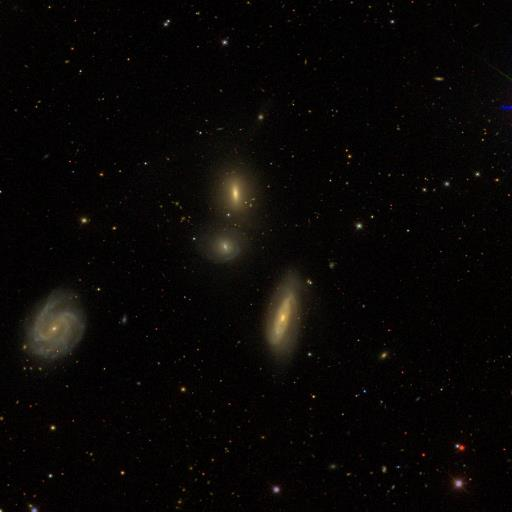

In [40]:
IPython.display.Image('HCG7_SDSS_cutout.jpg')

Repeating process for Andromeda galaxy (M32)

In [41]:
source = SkyCoord.from_name('M32')
source 

<SkyCoord (ICRS): (ra, dec) in deg
    (10.67427083, 40.86516944)>

In [76]:
impix = 512
imsize = 50*u.arcmin
cutoutbaseurl = 'http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx'
query_string = urlencode(dict(ra=source.ra.deg, 
                                     dec=source.dec.deg, 
                                     width=impix, height=impix, 
                                     scale=imsize.to(u.arcsec).value/impix))
url = cutoutbaseurl + '?' + query_string

# this downloads the image to your disk
urlretrieve(url, 'M32_SDSS_cutout.jpg')

('M32_SDSS_cutout.jpg', <http.client.HTTPMessage at 0x123a8c290>)

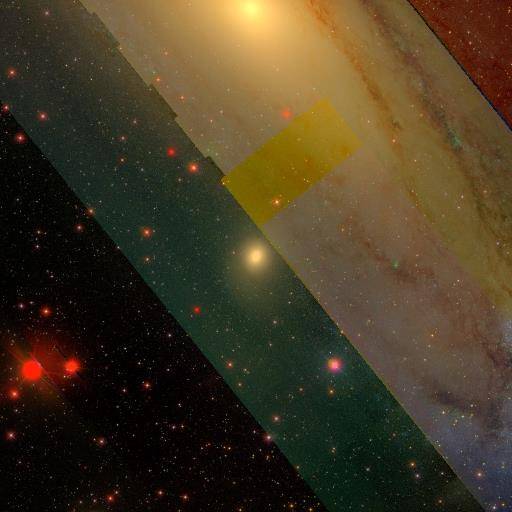

In [77]:
IPython.display.Image('M32_SDSS_cutout.jpg')

# Section 2: Computing galactic orbits of stars with GAIA

### Imports

In [84]:
# astropy imports
import astropy.coordinates as coord
from astropy.table import QTable
import astropy.units as u
from astroquery.gaia import Gaia

# Third-party imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#gala imports
from astroquery.gaia import Gaia


In [85]:
query_text = '''SELECT TOP 4096 ra, dec, parallax, pmra, pmdec, radial_velocity,
phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag
FROM gaiadr2.gaia_source
WHERE parallax_over_error > 10 AND
    parallax > 10 AND
    radial_velocity IS NOT null
ORDER BY random_index
'''

In [87]:
job = Gaia.launch_job(query_text)
gala_data = job.get_results()
gala_data.write('gala_data.fits')

In [88]:
gaia_data = QTable.read('gaia_data.fits')

In [90]:
gaia_data[:4]

ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
deg,deg,mas,mas / yr,mas / yr,km / s,mag,mag,mag
float64,float64,float64,float64,float64,float64,float32,float32,float32
256.8370985186671,46.5081010273448,10.770964834345387,-19.76657104695835,55.92605676622464,-17.673072044811907,12.956912994384766,14.192928314208984,11.859498023986816
129.45826809010867,-6.806694022293258,41.081670013380716,-297.34595349374183,43.83424795415093,35.53814452290586,6.576352119445801,6.931065082550049,6.111272811889648
2.317856723637118,9.00699655780345,17.824765284426462,-171.8278607514459,-1083.8740928197751,-148.91780163518774,13.119074821472168,13.968703269958496,12.223302841186523
330.41287472805976,51.88897801553169,13.0756133009657,-85.30745872006916,-34.23366534215265,-28.726469345049587,12.101919174194336,13.05264949798584,11.149785995483398


Can access each colums

In [91]:
Gaia.data['ra']
Gaia.data['radial_velocity']
gaia.data['parallax']

NameError: name 'gaia' is not defined